In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wiggle_bin_simulation import simulate

In [2]:
def add_worm_temperature_zones():
    """Add worm comfort and danger temperature zones as horizontal lines to a plot."""
    plt.axhline(35, linestyle='--', color='red', label='Worm Danger Max (35°C)')
    plt.axhline(30, linestyle='--', color='green', label='Worm Comfort Max (30 °C)')
    plt.axhline(15, linestyle='--', color='green', label='Worm Comfort Min (15 °C)')
    plt.axhline(5, linestyle='--', color='orange', label='Worm Slow Down Min (5 °C)')
    plt.axhline(0, linestyle='--', color='red', label='Worm Danger Min (0 °C)')

In [3]:
import xarray as xr

# Load dataset
cold_winters_temp = xr.open_dataset("emwcf/jan-feb-2016-2018-2019-2021/instant.nc")  # temperatures
cold_winters_rad = xr.open_dataset("emwcf/jan-feb-2016-2018-2019-2021/accum.nc")  # radiation

cold_winters_combined = xr.merge([cold_winters_temp, cold_winters_rad])

# Convert to DataFrame
cold_winters = cold_winters_combined.to_dataframe().reset_index()

# Convert Kelvin to Celsius
cold_winters['temp'] = cold_winters['t2m'] - 273.15
cold_winters['soil_0_7'] = cold_winters['stl1'] - 273.15

# Convert J/m² to W/m²
cold_winters['sun'] = cold_winters['ssrd'] / 3600

In [4]:
cold_winters = cold_winters.rename(columns={"valid_time": "time"})
cold_winters['month'] = pd.to_datetime(cold_winters['time']).dt.month
cold_winters = cold_winters.set_index('time')

In [5]:
import matplotlib.pyplot as plt

# Ensure index is datetime
cold_winters.index = pd.to_datetime(cold_winters.index)

# Filter for February 2021
feb_2021 = cold_winters.loc['2021-02']
jan_2019 = cold_winters.loc['2019-01']
feb_2018 = cold_winters.loc['2018-02']
jan_2016 = cold_winters.loc['2016-01']

# Compare bin setups

In [6]:
selected_winter = cold_winters.loc['2021-02'].copy()

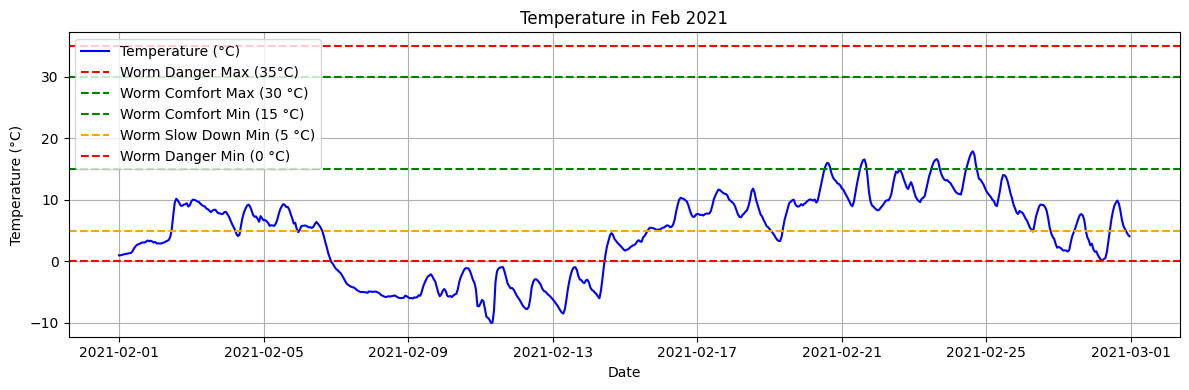

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(selected_winter.index, selected_winter['temp'], label='Temperature (°C)', color='blue')
add_worm_temperature_zones()
plt.title("Temperature in Feb 2021")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Black bin in sun

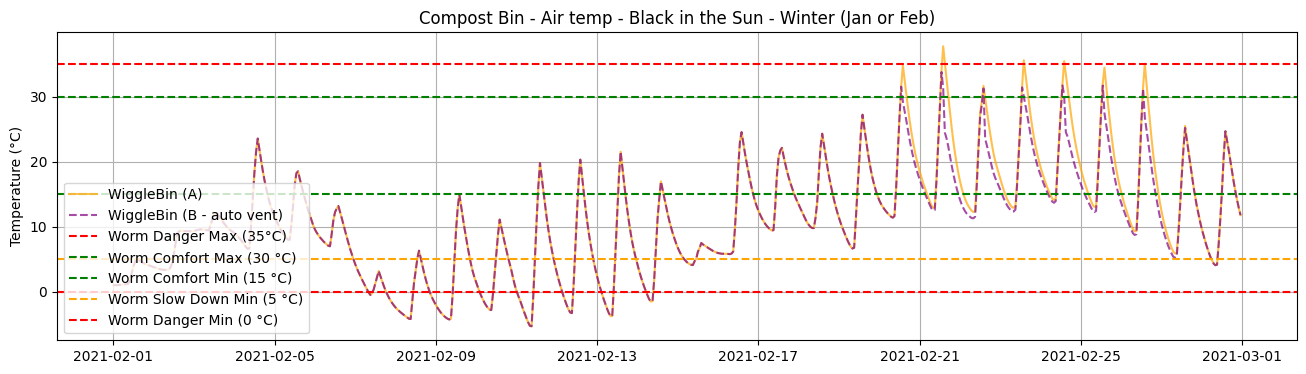

In [8]:
# air ambient
selected_winter['bin_black_a'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True
)
selected_winter['bin_black_b'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_winter.index, selected_winter['bin_black_a'], label='WiggleBin (A)', color='orange', alpha=0.7)
plt.plot(selected_winter.index, selected_winter['bin_black_b'], label='WiggleBin (B - auto vent)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Air temp - Black in the Sun - Winter (Jan or Feb)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()

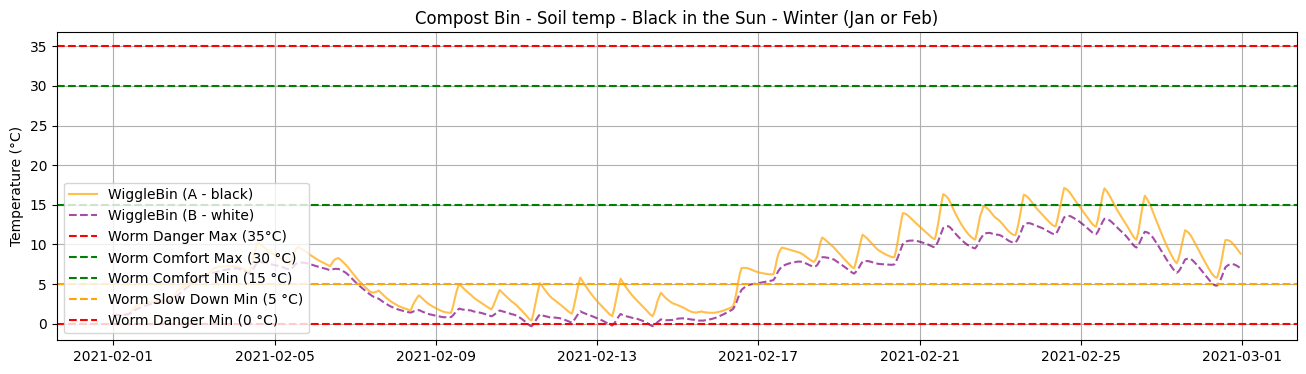

In [9]:
# soil ambient
selected_winter['bin_black_soil_a'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True
)
selected_winter['bin_black_soil_b'] = simulate(
    selected_winter,
    partial_shade=True,
    color='white',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_winter.index, selected_winter['bin_black_soil_a'], label='WiggleBin (A - black)', color='orange', alpha=0.7)
plt.plot(selected_winter.index, selected_winter['bin_black_soil_b'], label='WiggleBin (B - white)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Soil temp - Black in the Sun - Winter (Jan or Feb)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()

### Black bin with solar heating panel

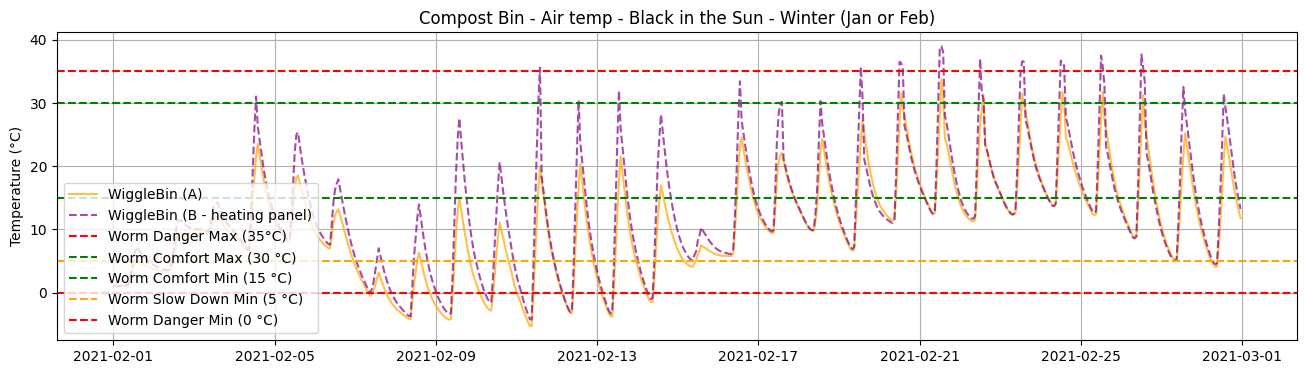

In [14]:
# air ambient
selected_winter['bin_solar_panel_a'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True,
)
selected_winter['bin_solar_panel_b'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True,
    solar_heating_panel=True,
    solar_panel_area=0.5
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_winter.index, selected_winter['bin_solar_panel_a'], label='WiggleBin (A)', color='orange', alpha=0.7)
plt.plot(selected_winter.index, selected_winter['bin_solar_panel_b'], label='WiggleBin (B - heating panel)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Air temp - Black in the Sun - Winter (Jan or Feb)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()

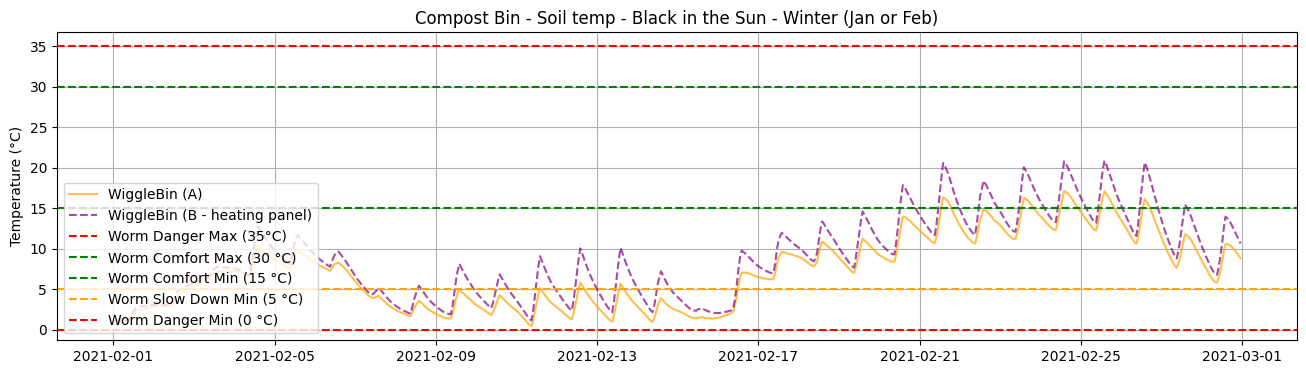

In [13]:
# soil ambient
selected_winter['bin_solar_panel_soil_a'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True
)
selected_winter['bin_solar_panel_soil_b'] = simulate(
    selected_winter,
    partial_shade=True,
    color='black',
    insulation=True,
    auto_venting_lid=True,
    use_soil_as_ambient=True,
    solar_heating_panel=True,
    solar_panel_area=0.5
)

plt.figure(figsize=(16, 4))
# plt.plot(selected_summer.index, selected_summer['temp'], label='Air Temp', color='skyblue')
# plt.plot(selected_summer.index, selected_summer['soil_0_7'], label='Soil Temp', color='brown', linestyle="--", alpha=0.5)
plt.plot(selected_winter.index, selected_winter['bin_solar_panel_soil_a'], label='WiggleBin (A)', color='orange', alpha=0.7)
plt.plot(selected_winter.index, selected_winter['bin_solar_panel_soil_b'], label='WiggleBin (B - heating panel)', color='purple', alpha=0.7, linestyle="--")
plt.title("Compost Bin - Soil temp - Black in the Sun - Winter (Jan or Feb)")
plt.ylabel("Temperature (°C)")
add_worm_temperature_zones()
plt.legend(loc='lower left')
plt.grid()
plt.show()